In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# https://stackoverflow.com/a/17303428 - original answer for color coordination in print statements
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    

# purchases = "https://raw.githubusercontent.com/iitsalex/Keyboard-Data-Testing/master/purchases-sheet.csv"
# google docs file must be edited at the end to include /export?gid-...- in order to import correctly
# https://stackoverflow.com/a/35246041 - original answer
purchases = "https://docs.google.com/spreadsheets/d/1dxvffAQC1SNPVGqKWQyUGLGGduABcw-r-JswAWowZso/export?gid=0&format=csv"
data = pd.read_csv(purchases)
# data = pd.read_csv(purchased, index_col=0) # to remove the ID/Index field on the left
data

,Item,Paid,Value,Status,Type,Purchased From,Date Purchased,Notes
0,Rotary Encoders (5x),9.62,9.62,Present,Part/Accessory,Amazon,8/2020,NaN
1,Diodes (100x),4.29,4.29,Present,Part/Accessory,Amazon,8/2020,NaN
2,Pro Micro (3x),16.00,16.00,Present,Part/Accessory,Amazon,8/2020,NaN
3,Planck Case,10.81,8.00,Present,Part/Accessory,Amazon,6/2020,NaN
4,Let's Split Screws,3.45,3.45,Present,Part/Accessory,Amazon,6/2020,NaN
...,...,...,...,...,...,...,...,...
101,Spudgers,2.40,2.40,Present,Part/Accessory,Aliexpress,3/2020,NaN
102,Cringe Booty Spacebar,4.98,4.98,Present,Keycaps,Aliexpress,1/2020,NaN
103,KAT Blanks,55.00,55.00,GB,Keycaps,ApexKeyboards,6/2020,NaN
104,Kanye Keycap (extra),77.00,77.00,Sold,Keycaps,Mechmarket,9/2020,NaN


In [119]:
total_paid = data.Paid.sum()
print(f'Total Paid: {total_paid}')

net_value_raw = data.Value.sum()
print(f'Net Value (Raw/Unadjusted): {net_value_raw}')

Total Paid: 7060.18
Net Value (Raw/Unadjusted): 9465.17


In [120]:
types = data.Type.unique()
current_cash_invested = 0

print(color.BOLD + "Type Totals" + color.END)
for t in types:
    new_df = data[data["Type"] == t]
    net_cost_df = new_df[new_df["Status"] == "Sold"]
    
    total = len(new_df.index)
    paid_total = round(new_df.Paid.sum(), 2)
    value_total = round(new_df.Value.sum(), 2)
    net_damage = round(paid_total - round(net_cost_df.Value.sum(), 2), 2)
    
    current_cash_invested += net_damage
    
    print(f'{color.BLUE}{t}: {total} items{color.END}')
    print(f'Paid: ${paid_total}')
    print(f'Value: ${value_total}')
    print(f'Net Damage: ${net_damage}')
    
print(f'\nCurrent Cash Invested: ${current_cash_invested}')

Type Totals
Part/Accessory: 34 items
Paid: $653.4
Value: $700.1
Net Damage: $544.9
Switches: 22 items
Paid: $899.57
Value: $1226.63
Net Damage: $485.14
Lube: 8 items
Paid: $95.28
Value: $95.28
Net Damage: $95.28
Keyboard: 10 items
Paid: $2277.25
Value: $2870.0
Net Damage: $2027.25
Keycaps: 22 items
Paid: $2810.68
Value: $4109.16
Net Damage: $2138.5
Deskpad: 10 items
Paid: $324.0
Value: $464.0
Net Damage: $160.0

Current Cash Invested: $5451.07


In [121]:
types = data.Status.unique()
current_cash_invested = 0

print(color.BOLD + "Status Totals" + color.END)
for t in types:
    new_df = data[data["Status"] == t]
    
    total = len(new_df.index)
    paid_total = round(new_df.Paid.sum(), 2)
    value_total = round(new_df.Value.sum(), 2)
    
    print(f'{color.BLUE}{t}: {total} items{color.END}')
    print(f'Paid: ${paid_total}')
    print(f'Value: ${value_total}')

Status Totals
Present: 60 items
Paid: $2520.81
Value: $3386.06
Sold: 26 items
Paid: $1463.76
Value: $1609.11
GB: 20 items
Paid: $3075.61
Value: $4470.0


In [122]:
data[data["Type"] == "Keycaps"]

,Item,Paid,Value,Status,Type,Purchased From,Date Purchased,Notes
18,GMK Bushido (Base + Nomad),195.02,330.00,GB,Keycaps,NovelKeys,4/2020,NaN
22,KAT Milkshake Ortho + Katakanas,105.18,105.18,Sold,Keycaps,NovelKeys,6/2020,NaN
23,GMK Camping R2 Base,185.00,260.00,Present,Keycaps,NovelKeys,8/2020,NaN
25,GMK Camping R2 Novelties,60.00,80.00,Present,Keycaps,NovelKeys,8/2020,NaN
29,GMK Olivia Base Kit,195.02,300.00,Present,Keycaps,NovelKeys,9/2020,Yeehaw extras go brrrrr
30,GMK Olivia Extension + Spacebars,90.48,130.00,Present,Keycaps,NovelKeys,9/2020,NaN
33,DSA Caps,16.00,16.00,Sold,Keycaps,Flashquark,5/2020,NaN
37,GMK Fro.yo,220.00,270.00,Present,Keycaps,ZFrontier,9/2020,NaN
43,KAT Mizu set,162.00,250.00,GB,Keycaps,Cannonkeys,9/2020,NaN
44,KAT Mizu set (Harold),144.00,144.00,Sold,Keycaps,Cannonkeys,9/2020,NaN


In [123]:
data[data["Status"] == "GB"].sort_values(by=['Date Purchased'])

,Item,Paid,Value,Status,Type,Purchased From,Date Purchased,Notes
18,GMK Bushido (Base + Nomad),195.02,330.0,GB,Keycaps,NovelKeys,4/2020,NaN
73,Infinikey Islander Deskpad,20.00,50.0,GB,Deskpad,TheKeyCompany,5/2020,NaN
72,Infinikey Islander Bundle,160.00,280.0,GB,Keycaps,TheKeyCompany,5/2020,NaN
79,Ikki68 Keyboard (White/Gold) + Brass Plate,322.89,450.0,GB,Keyboard,WuqueStudio,6/2020,NaN
103,KAT Blanks,55.00,55.0,GB,Keycaps,ApexKeyboards,6/2020,NaN
85,GMK Laser R2,218.00,300.0,GB,Keycaps,Drop,7/2020,NaN
57,Keyforge Artisans,150.00,200.0,GB,Keycaps,Keyforge,7/2020,NaN
58,UHMWPE Linear Stems,19.49,40.0,GB,Part/Accessory,Drop,7/2020,NaN
66,Dogikon Switches,42.96,70.0,GB,Switches,InfinityKey,7/2020,NaN
67,GMK Nord base,125.00,250.0,GB,Keycaps,MKUltra,7/2020,NaN


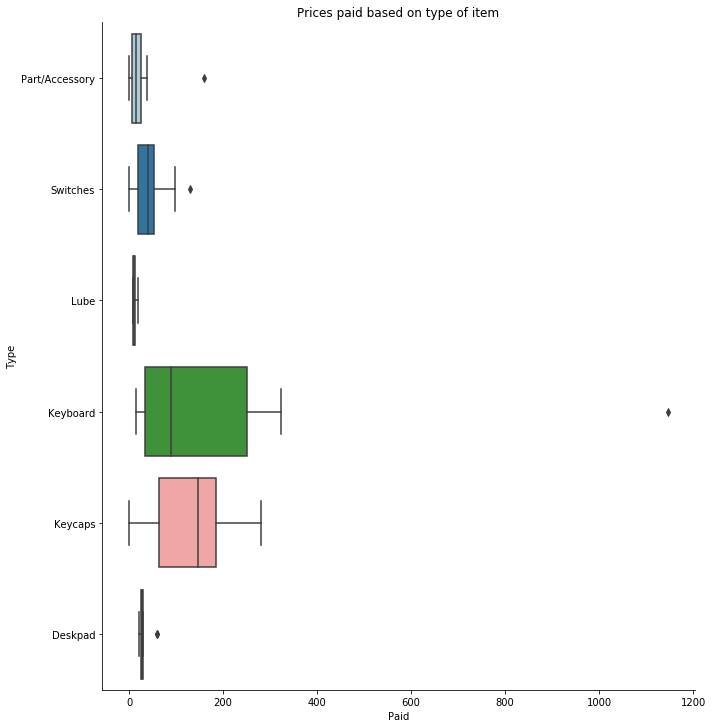

In [134]:
sns.catplot(
    data=data, 
    x="Paid",
    y="Type",
    aspect=1, # aspect change the aspect ratio
    kind="box",
    height=10,
    palette="Paired"
    ) 
plt.title("Prices paid based on type of item");

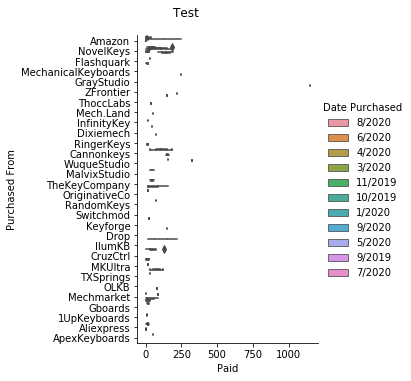

In [138]:
g=sns.catplot(
    data=data,
    x="Paid",
    y="Purchased From",
    kind="box",
    hue="Date Purchased",
)
g.fig.suptitle("Test", y=1.05);

# Prices paid for items (excluding think6.5v2)

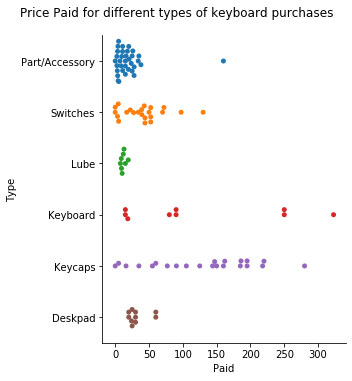

In [223]:
excluding_gray = data[data["Paid"] < 1000]
g=sns.catplot(
    data=excluding_gray,
    x="Paid",
    y="Type",
    kind="swarm"
    )

g.fig.suptitle("Price Paid for different types of keyboard purchases", y=1.05);

# Values for items (excluding think6.5v2)

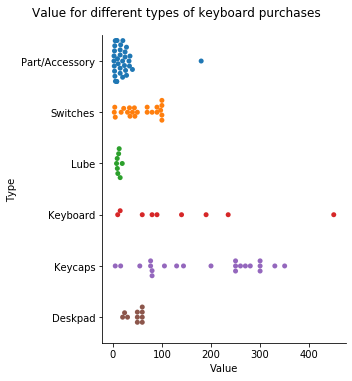

In [224]:
excluding_gray = data[data["Paid"] < 1000]
g=sns.catplot(
    data=excluding_gray,
    x="Value",
    y="Type",
    kind="swarm"
    )
g.fig.suptitle("Value for different types of keyboard purchases", y=1.05);

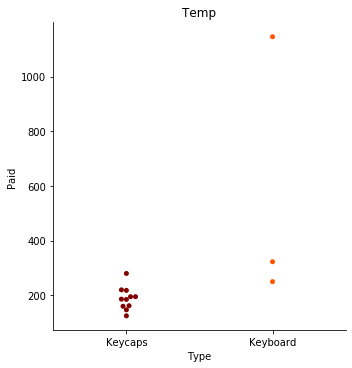

In [169]:
expensive_df = data[data["Value"] > 200]

sns.catplot(
    data=expensive_df, 
    x="Type",
    y="Paid",
    aspect=1, # aspect change the aspect ratio
    kind="swarm",
    height=5,
    palette="gist_heat"
    ) 
plt.title("Temp");

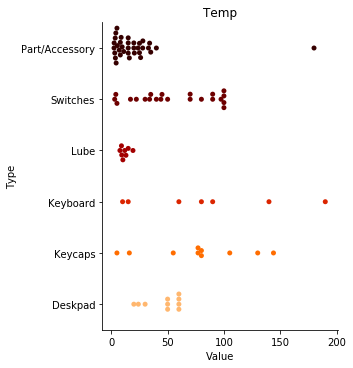

In [228]:
cheap_df = data[data["Value"] < 200]
sns.catplot(
    data=cheap_df, 
    x="Value",
    y="Type",
    aspect=1, # aspect change the aspect ratio
    kind="swarm",
    height=5,
    palette="gist_heat"
    ) 
plt.title("Temp");

In [2]:
parts = data[data["Type"] == "Part/Accessory"]
parts

,Item,Paid,Value,Status,Type,Purchased From,Date Purchased,Notes
0,Rotary Encoders (5x),9.62,9.62,Present,Part/Accessory,Amazon,8/2020,NaN
1,Diodes (100x),4.29,4.29,Present,Part/Accessory,Amazon,8/2020,NaN
2,Pro Micro (3x),16.00,16.00,Present,Part/Accessory,Amazon,8/2020,NaN
3,Planck Case,10.81,8.00,Present,Part/Accessory,Amazon,6/2020,NaN
4,Let's Split Screws,3.45,3.45,Present,Part/Accessory,Amazon,6/2020,NaN
7,Switch/Keycap Puller,5.40,5.40,Present,Part/Accessory,Amazon,4/2020,NaN
10,Switch Top Remover,8.73,8.73,Present,Part/Accessory,Amazon,3/2020,NaN
12,Asceny Cable,0.00,20.00,Present,Part/Accessory,Amazon,10/2019,NaN
24,Deskeys Switch Films,7.00,7.00,Present,Part/Accessory,NovelKeys,8/2020,NaN
28,Durock Stabilizers (6x),23.71,23.71,Present,Part/Accessory,NovelKeys,8/2020,NaN


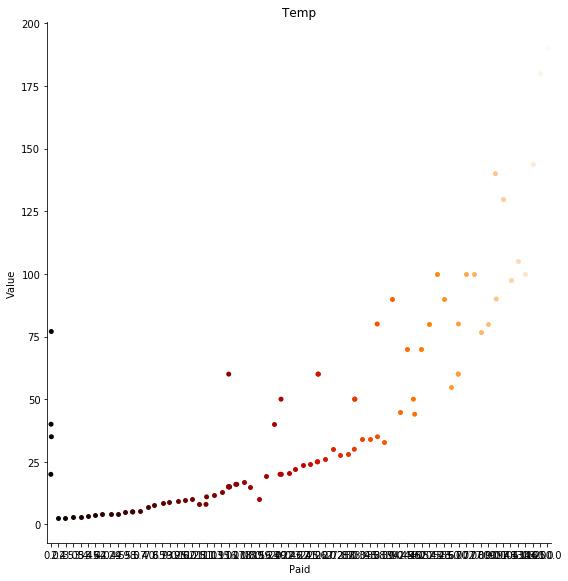

In [233]:
cheap_df = data[data["Value"] < 200]
sns.catplot(
    data=cheap_df, 
    x="Paid",
    y="Value",
    aspect=1, # aspect change the aspect ratio
    height=8,
    palette="gist_heat"
    ) 
plt.title("Temp");

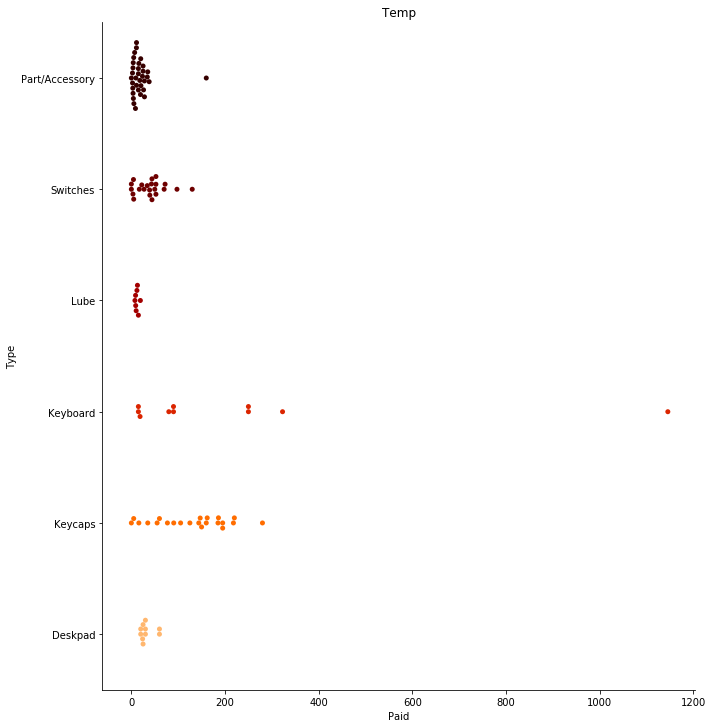

In [175]:
sns.catplot(
    data=data, 
    x="Paid",
    y="Type",
    aspect=1, # aspect change the aspect ratio
    kind="swarm",
    height=10,
    palette="gist_heat"
    ) 
plt.title("Temp");